In [9]:
from dolfin import *

#importing matplotlib to plot results 
from matplotlib import pyplot as plt

#importing time to time length of mesh creation
import time

#importing numpy to work with arrays
import numpy as np

#Increasing the width of the notebook (visual difference only)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<IPython.core.display.Javascript object>


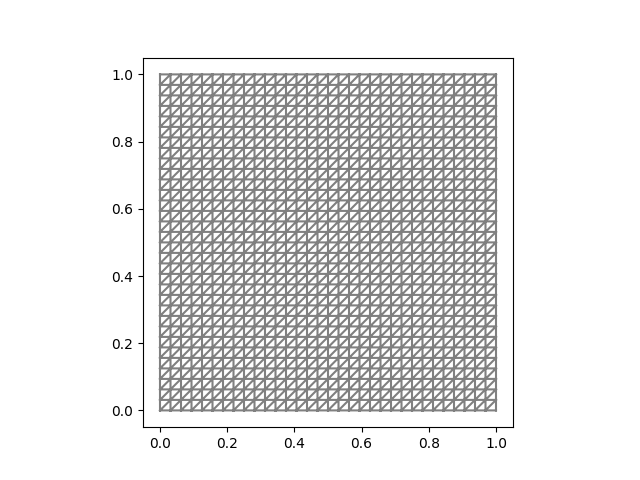

In [18]:
#have to define where to put plots BEFORE importing matplotlib
%matplotlib notebook

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

plt.subplots()

plot(mesh)

In [12]:
# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

In [13]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree = 1)
g = Expression("sin(5*x[0])", degree = 1)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

In [14]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

In [15]:
# Save solution in VTK format
file = File("poisson.pvd")
file << u

<IPython.core.display.Javascript object>


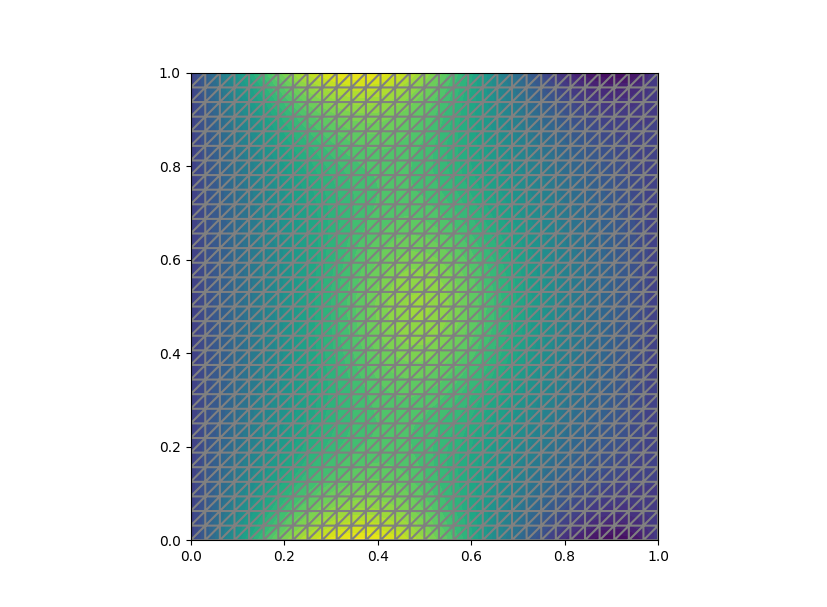

In [20]:
# Plot solution
plt.subplots()

plot(mesh)
plot(u)